<a href="https://colab.research.google.com/github/AmruthaVPalankar/GLA-MINI-PROJECT/blob/main/Plant_Disease_Prediction_CNN_image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Seeding for reproducibility**

In [34]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [35]:
import os
import json
from zipfile import ZipFile
from PIL import ImageChops
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


**Data Curation**

Upload the kaggle.json file

In [36]:
!pip install kaggle

In [37]:
kaggle_credentails = json.load(open("kaggle.json"))

In [38]:
# setup kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [39]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
!ls

 drive	 kaggle.json  'plantvillage dataset'   plantvillage-dataset.zip   sample_data


In [41]:
# Unzip the download dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
  zip_ref.extractall()

In [42]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Grape___Esca_(Black_Measles)', 'Peach___healthy', 'Tomato___Bacterial_spot', 'Apple___Apple_scab', 'Apple___healthy']
38
['Grape___Esca_(Black_Measles)', 'Peach___healthy', 'Tomato___Bacterial_spot', 'Apple___Apple_scab', 'Apple___healthy']
38
['Grape___Esca_(Black_Measles)', 'Peach___healthy', 'Tomato___Bacterial_spot', 'Apple___Apple_scab', 'Apple___healthy']


**Number of classes = 38**

In [43]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])


423
['cd71e97d-cc73-4fdd-b625-c735844c3ce7___Mt.N.V_HL 6185.JPG', '92fbe3df-dc85-4e06-8109-3a14f5109b29___Mt.N.V_HL 6173.JPG', 'd966ee8e-abdc-4841-94a5-ae1bed9da16c___Mt.N.V_HL 9094.JPG', '4bd1e0f6-b69e-4936-83a2-235e6f8d7479___Mt.N.V_HL 6044.JPG', 'e6073510-a72b-441c-9b8a-a2de063a54a4___Mt.N.V_HL 6093.JPG']


**Data Preprocessing**


In [44]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

In [45]:
image_path = r'C:\Content\plantvillage dataset\color\Apple__Cedar_apple_rust\025b2b9a-0ec4-4132-96ac-7f2832d0db4a__FREC_C.Rust_3655.JPG'


In [46]:
import os
print("Current working directory:", os.getcwd())



Current working directory: /content


In [47]:
from google.colab import drive
drive.mount('/content/drive')

image_path = '/content/drive/My Drive/plantvillage dataset/color/Apple__Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a__FREC_C.Rust_3655.JPG'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#directory = '/content/Content/plantvillage dataset/color/Apple__Cedar_apple_rust'
#print("Files in directory:", os.listdir(directory))

In [49]:
base_directory = '/content'
print("Directories in /content:", os.listdir(base_directory))


Directories in /content: ['.config', 'drive', 'plantvillage-dataset.zip', 'kaggle.json', 'plantvillage dataset', 'sample_data']


In [50]:
directory = '/content/plantvillage dataset/color/Apple__Cedar_apple_rust'

In [51]:
directory = '/content/plantvillage dataset'
print("Subdirectories in plantvillage dataset:", os.listdir(directory))

Subdirectories in plantvillage dataset: ['color', 'grayscale', 'segmented']


In [52]:
directory = '/content/plantvillage dataset/color'
print("Subdirectories in color:", os.listdir(directory))

Subdirectories in color: ['Grape___Esca_(Black_Measles)', 'Peach___healthy', 'Tomato___Bacterial_spot', 'Apple___Apple_scab', 'Apple___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Northern_Leaf_Blight', 'Strawberry___healthy', 'Tomato___healthy', 'Soybean___healthy', 'Potato___healthy', 'Grape___Black_rot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Septoria_leaf_spot', 'Pepper,_bell___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Pepper,_bell___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Blueberry___healthy', 'Tomato___Early_blight', 'Squash___Powdery_mildew', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Strawberry___Leaf_scorch', 'Cherry_(including_sour)___Powdery_mildew', 'Orange___Haunglongbing_(Citrus_greening)', 'Potato___Late_blight', 'Tomato___Target_Spot', 'Corn_(maize)___Common_rust_', 'Apple___Black_rot', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_

In [53]:
directory = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust'
print("Files in Apple___Cedar_apple_rust:", os.listdir(directory))

Files in Apple___Cedar_apple_rust: ['4e6676b6-154c-4f7d-a355-bcc00a397c3d___FREC_C.Rust 9853.JPG', 'a3141843-3628-45c2-ac01-5b1726744c6d___FREC_C.Rust 9906.JPG', 'cf65a122-3455-40dc-8ba0-f6f71c4b0782___FREC_C.Rust 3673.JPG', '9f8d81c0-6a20-47df-b52a-46820078fd74___FREC_C.Rust 3626.JPG', '79e57aaf-f825-4818-9594-621327134e0b___FREC_C.Rust 4219.JPG', '763123be-8a12-4d7a-8fa5-deff863b70f9___FREC_C.Rust 3691.JPG', '5b1f2adb-5065-4b7f-8b51-bc5695ad5ebb___FREC_C.Rust 9802.JPG', 'c8ef20c5-1117-4774-aeec-0f263f9f3b3c___FREC_C.Rust 3853.JPG', 'd7fb4740-9707-484f-9809-b7efa8f7851d___FREC_C.Rust 4344.JPG', 'f6af5eb5-6338-48a2-8b23-c7143b7f4a62___FREC_C.Rust 0016.JPG', '85f1b51d-ad5e-4ec2-a46b-2a9dade22e2a___FREC_C.Rust 9971.JPG', '5069c246-1254-4396-a0f3-11bb6becd234___FREC_C.Rust 9868.JPG', '5c2677da-56e7-47bc-bc21-31a1db9ff5bf___FREC_C.Rust 9799.JPG', '91c6f875-414d-4449-937c-488718a84921___FREC_C.Rust 3756.JPG', '17b9f64c-4660-424f-9c8e-d9a49654e512___FREC_C.Rust 3776.JPG', 'c16bbb5c-bd59-4568

In [54]:
import os

root_dir = '/content/plantvillage dataset'
target_file = '025b2b9a-0ec4-4132-96ac-7f2832d0db4a__FREC_C.Rust_3655.JPG'

for root, dirs, files in os.walk(root_dir):
    if target_file in files:
        print(f"File found at: {os.path.join(root, target_file)}")
        break
else:
    print(f"File {target_file} not found in {root_dir}.")

File 025b2b9a-0ec4-4132-96ac-7f2832d0db4a__FREC_C.Rust_3655.JPG not found in /content/plantvillage dataset.


In [55]:
directory = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust'
files = os.listdir(directory)
if files:
    print("Using a different file:", files[0])
    image_path = os.path.join(directory, files[0])
else:
    print("No files found in the directory.")

Using a different file: 4e6676b6-154c-4f7d-a355-bcc00a397c3d___FREC_C.Rust 9853.JPG


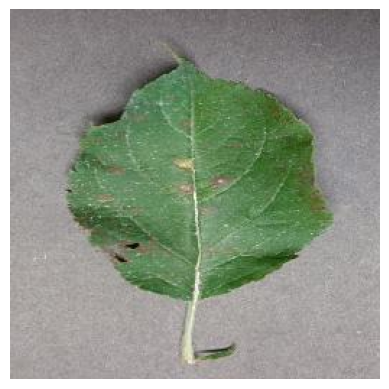

In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

if os.path.exists(image_path):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print(f"Image not found at path: {image_path}")

In [57]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [58]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [61]:
base_dir = '/content/plantvillage dataset/color'

In [62]:
import os
print("Directory exists:", os.path.exists(base_dir))

Directory exists: True


In [63]:
base_dir = base_dir.replace('\xa0', ' ')
print("Cleaned base directory:", base_dir)
print("Directory exists:", os.path.exists(base_dir))

Cleaned base directory: /content/plantvillage dataset/color
Directory exists: True


In [64]:
print("Subdirectories in base directory:", os.listdir(base_dir))

Subdirectories in base directory: ['Grape___Esca_(Black_Measles)', 'Peach___healthy', 'Tomato___Bacterial_spot', 'Apple___Apple_scab', 'Apple___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Northern_Leaf_Blight', 'Strawberry___healthy', 'Tomato___healthy', 'Soybean___healthy', 'Potato___healthy', 'Grape___Black_rot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Septoria_leaf_spot', 'Pepper,_bell___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Pepper,_bell___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Blueberry___healthy', 'Tomato___Early_blight', 'Squash___Powdery_mildew', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Strawberry___Leaf_scorch', 'Cherry_(including_sour)___Powdery_mildew', 'Orange___Haunglongbing_(Citrus_greening)', 'Potato___Late_blight', 'Tomato___Target_Spot', 'Corn_(maize)___Common_rust_', 'Apple___Black_rot', 'Tomato___Late_blight', 'Tomato___Tomat

In [67]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [66]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**Convolution Neural Networks**

In [68]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model Training**

In [71]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 134s 93ms/step - accuracy: 0.6049 - loss: 1.8652 - val_accuracy: 0.8377 - val_loss: 0.5231
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 2.0812
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 99s 72ms/step - accuracy: 0.9191 - loss: 0.2484 - val_accuracy: 0.8739 - val_loss: 0.4253
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 3.3140e-05
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 145s 75ms/step - accuracy: 0.9677 - loss: 0.0997 - val_accuracy: 0.8465 - val_loss: 0.6438


**Model Evolution**

In [73]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.8560 - loss: 0.6325
Validation Accuracy: 84.65%


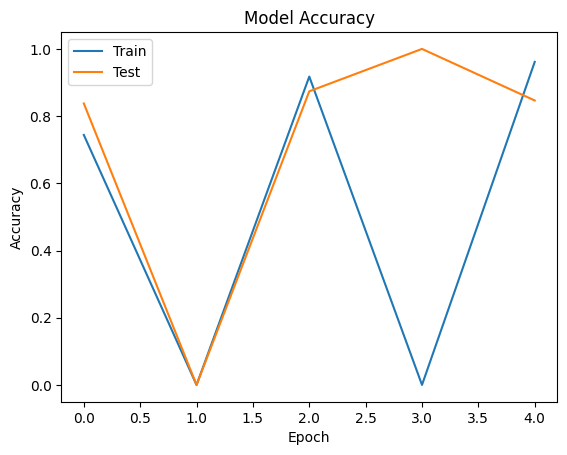

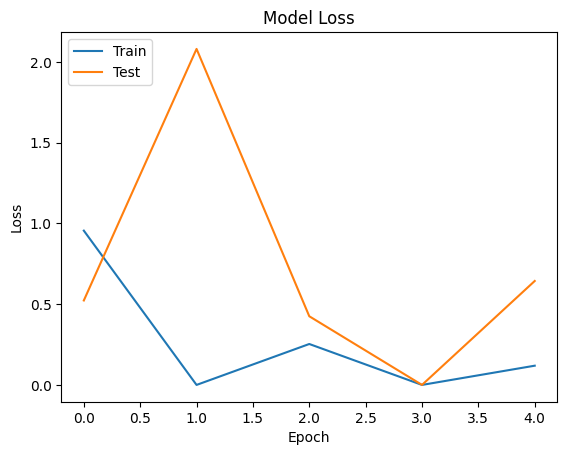

In [74]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [77]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.0
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [78]:
#create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [79]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [80]:
#saving the class names as json file
json.dump(class_indices, open("class_indices.json", "w"))